Prétraitement images

In [1]:
from os import listdir

image_folder = 'images/'
list_image = [file for file in listdir(image_folder)]
print(len(list_image))

1050


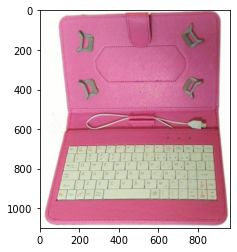

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

test = 'images/00e966a5049a262cfc72e6bbf68b80e7.jpg'
image = imread(test)
plt.imshow(image)
plt.show()

In [3]:
import pandas as pd
from sklearn import preprocessing

df = pd.read_csv('cleaned.csv')

# définir une fonction lambda pour extraire la catégorie principale
extract_category = lambda x: x.split(">>")[0].strip().strip(']["')

# appliquer la fonction à la colonne 'product_category_tree' du DataFrame
df["label_name"] = df['product_category_tree'].apply(extract_category)
df["label_name"][1]

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


'Baby Care'

In [4]:
label_encoder = preprocessing.LabelEncoder()
label_encoder .fit(df["label_name"])
df["label"]=label_encoder.transform(df["label_name"])
df["label"][0:3]

0    4
1    0
2    0
Name: label, dtype: int32

In [5]:
df['image_folder'] = df.uniq_id + '.jpg'
df.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,label_name,label,image_folder
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,"[""http://img6a.flixcart.com/image/curtain/q/8/...",False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,4,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,"[""http://img6a.flixcart.com/image/bath-towel/z...",False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,0,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,"[""http://img5a.flixcart.com/image/bath-towel/a...",False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,0,64d5d4a258243731dc7bbb1eef49ad74.jpg
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,"[""http://img6a.flixcart.com/image/bedsheet/d/r...",False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,4,d4684dcdc759dd9cdf41504698d737d8.jpg
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,"[""http://img6a.flixcart.com/image/bedsheet/w/q...",False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,4,6325b6870c54cd47be6ebfbffa620ec7.jpg


In [6]:
df_image = df[['uniq_id','label_name','label', 'image_folder']].copy()
df_image

,uniq_id,label_name,label,image_folder
0,55b85ea15a1536d46b7190ad6fff8ce7,Home Furnishing,4,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,7b72c92c2f6c40268628ec5f14c6d590,Baby Care,0,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,64d5d4a258243731dc7bbb1eef49ad74,Baby Care,0,64d5d4a258243731dc7bbb1eef49ad74.jpg
3,d4684dcdc759dd9cdf41504698d737d8,Home Furnishing,4,d4684dcdc759dd9cdf41504698d737d8.jpg
4,6325b6870c54cd47be6ebfbffa620ec7,Home Furnishing,4,6325b6870c54cd47be6ebfbffa620ec7.jpg
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Baby Care,0,958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046,fd6cbcc22efb6b761bd564c28928483c,Baby Care,0,fd6cbcc22efb6b761bd564c28928483c.jpg
1047,5912e037d12774bb73a2048f35a00009,Baby Care,0,5912e037d12774bb73a2048f35a00009.jpg
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Baby Care,0,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg


In [7]:
df.groupby("label_name")['uniq_id'].count()

label_name
Baby Care                     150
Beauty and Personal Care      150
Computers                     150
Home Decor & Festive Needs    150
Home Furnishing               150
Kitchen & Dining              150
Watches                       150
Name: uniq_id, dtype: int64

In [8]:
df.groupby("label")['uniq_id'].count()

label
0    150
1    150
2    150
3    150
4    150
5    150
6    150
Name: uniq_id, dtype: int64

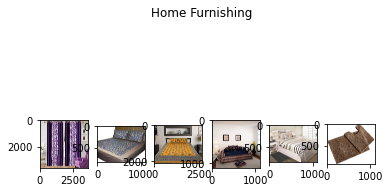

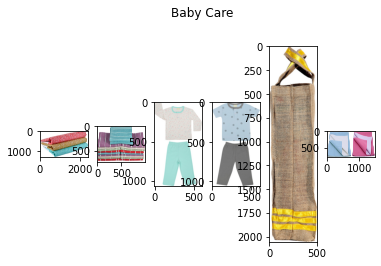

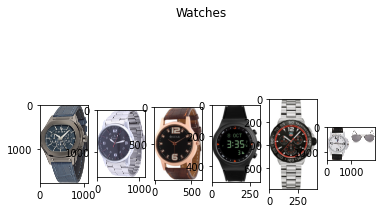

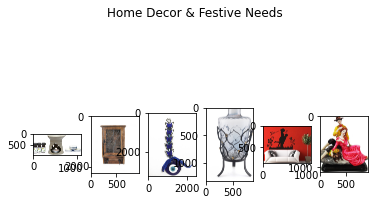

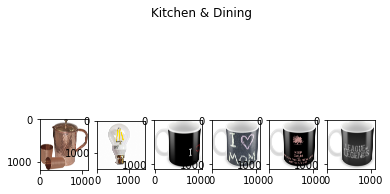

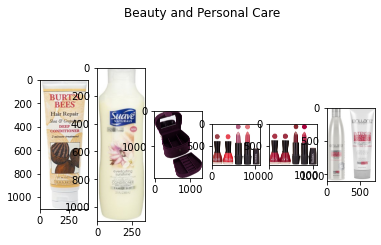

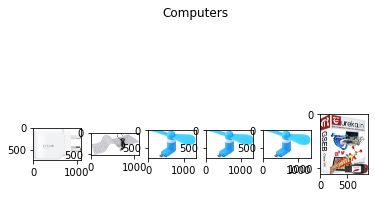

In [9]:
categories = df['label_name'].unique()

for cat in categories:
    # Sélectionner les premières photos de cette catégorie
    photos = df.loc[df['label_name'] == cat]['image_folder'][:6].tolist()
    
    fig, axs = plt.subplots(1, 6)
    
    for i, photo in enumerate(photos):
        img = plt.imread('./Images/'+photo)
        axs[i].imshow(img)
    
    fig.suptitle(cat)
    
    plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import cv2
import numpy as np

orb = cv2.ORB_create()

new_size = (256, 256)

list_image = [file for file in listdir(image_folder)]
labels = [file.split('.')[0] for file in list_image]

# Initialisation du détecteur ORB
orb = cv2.ORB_create()

# Fonction d'égalisation d'histogramme
def equalizedHist(image):
    if len(image.shape) == 3 and image.shape[2] == 3:
        # Convertir l'image en niveau de gris
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    # Égalisation de l'histogramme
    eq_hist = cv2.equalizeHist(gray)
    return eq_hist

# Extraction des features des images (ORB)
features = []
for filename in list_image:
    image = cv2.imread(image_folder+filename)
    # Redimensionner l'image
    image = cv2.resize(image, new_size)
    image = equalizedHist(image)
    kp, des = orb.detectAndCompute(image, None)
    if des is not None:
        # Vérifier que tous les descripteurs ont la même forme
        if des.shape[0] != 500:
            des = np.pad(des, ((0, 500 - des.shape[0]), (0, 0)), 'constant')
        features.append(des)
features = np.array(features)

# Aplatir les données pour que chaque ligne représente un échantillon
features = np.reshape(features, (features.shape[0], -1))

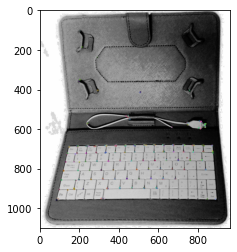

Descripteurs :  (500, 32)
[[ 34 221  56 ...  28 181 223]
 [190  90  10 ... 127  57 211]
 [222  66 194 ... 190  60  82]
 ...
 [203 200 117 ... 141  97 174]
 [191  71 101 ... 186 112 100]
 [ 39  23 235 ... 238 249 213]]


In [16]:
orb =  cv2.ORB_create()

image = cv2.imread('images/00e966a5049a262cfc72e6bbf68b80e7.jpg', cv2.IMREAD_GRAYSCALE) # convert in gray

image = cv2.equalizeHist(image)   # equalize l'histogramme de l'image

kp, des = orb.detectAndCompute(image, None)

img=cv2.drawKeypoints(image,kp,image)

plt.imshow(img)

plt.show()

print("Descripteurs : ", des.shape)

print(des)

In [30]:
import os

list_images = os.listdir(image_folder)

# Liste de descripteurs pour toutes les images
all_descriptors = []

# Boucle pour extraire les descripteurs ORB pour toutes les images
for image in list_images:
    # Charger l'image
    img = cv2.imread(image_folder + photo, 0)

    # Appliquer un flou gaussien et égaliser l'histogramme de l'image
    img = cv2.GaussianBlur(img, (5, 5), 0)
    img = cv2.equalizeHist(img)

    # Extraire les keypoints et descripteurs ORB
    kp, des = orb.detectAndCompute(img, None)

    # Ajouter les descripteurs à la liste de tous les descripteurs
    all_descriptors.append(des)

# Convertir la liste de descripteurs en un tableau numpy
all_descriptors_by_img = np.asarray(all_descriptors, dtype=object)
all_descriptors = np.concatenate(all_descriptors, axis=0)

# Afficher le nombre total de descripteurs pour toutes les images
print("Nombre de descripteurs : ", all_descriptors.shape[0])

Nombre de descripteurs :  525000


In [23]:
descriptors = pd.DataFrame(all_descriptors)
descriptors

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,219,207,98,254,180,128,78,181,173,8,...,69,239,178,249,238,216,62,158,241,9
1,124,120,187,116,56,205,81,48,226,232,...,240,8,251,221,37,120,192,160,70,59
2,120,161,216,100,61,9,80,41,113,164,...,195,5,219,235,65,121,98,160,78,10
3,95,92,102,64,83,246,251,80,165,196,...,52,204,19,127,139,195,175,183,124,86
4,96,160,144,252,108,141,232,105,235,17,...,194,81,149,188,19,60,80,0,67,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524995,215,9,239,88,213,230,77,199,245,201,...,48,206,123,62,158,192,141,81,240,38
524996,186,105,46,252,29,199,214,224,205,176,...,18,189,243,217,143,59,81,56,116,138
524997,94,205,20,170,29,199,86,169,143,44,...,73,189,185,208,175,211,20,14,28,11
524998,10,82,243,76,91,212,187,94,207,77,...,50,203,35,60,154,138,211,128,37,253


In [24]:
from scipy.spatial.distance import euclidean

# calcul de la distance euclidienne entre les descripteurs des images 0 et 1
dist = euclidean(descriptors.iloc[0], descriptors.iloc[1])

print("Distance euclidienne entre les images 0 et 1 :", dist)

Distance euclidienne entre les images 0 et 1 : 933.6894558684917


In [28]:
from sklearn import cluster, metrics

temps1=time.time()

k = int(round(np.sqrt(len(all_descriptors)),0))
#k=40
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(all_descriptors)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  725
Création de 725 clusters de descripteurs ...


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


temps de traitement kmeans :            11.83 secondes


In [31]:
temps = time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Matrice histogram
hist_vectors=[]

for i, image_desc in enumerate(all_descriptors_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :           843.09 secondes
